In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import erf
%matplotlib inline

In [2]:
data = np.loadtxt('./data.txt', delimiter=' ')

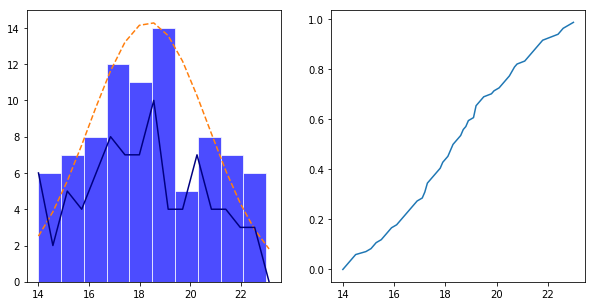

In [3]:
#Empirical distribution's function
def empirical_dist(_data):
    unique_data = np.unique(_data)
    _dist = np.zeros_like(unique_data)
    for i in range(unique_data.shape[0]):
        _dist[i] = np.sum(_data < unique_data[i]) / _data.shape[0]
    return _dist

#Graphics of histogram and empirical distribution
n_prime = np.array([2.52, 3.86, 5.56, 7.54, 9.65, 11.63, 13.21, 14.14, 14.27, 13.57, 12.16, 10.26, 8.17, 6.12, 4.33, 2.88, 1.81])
n_i = np.array([6, 2, 5, 4, 6, 8, 7, 7, 10, 4, 4, 7, 4, 4, 3, 3, 0])
x_i = np.array([14, 14.57, 15.14, 15.71, 16.28, 16.85, 17.42, 17.99, 18.56, 19.13, 19.7, 20.27, 20.84, 21.41, 21.98, 22.55, 23.12])
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(data, facecolor='blue', alpha=0.7, edgecolor='white')
ax2.plot(np.unique(data), empirical_dist(data))
ax1.plot(x_i, n_prime, ls='--')
ax1.plot(x_i, n_i, color='navy')
fig.set_size_inches(10, 5)
plt.show()

In [4]:
#Mean value
m = np.mean(data)
print(f'Mean value: {m:2.4f}')

Mean value: 18.3571


In [5]:
#Dispersion
d = np.sum(np.square(data - m)) / data.shape[0]
print(f'Dispersion: {d:2.4f}')

Dispersion: 5.4653


In [6]:
#Standard error
se = (d ** (1/2)) / (data.shape[0] ** (1/2))
print(f'Standard error: {se:2.4f}')

Standard error: 0.2551


In [7]:
#Mode
sorted_data = np.sort(data)
mod = np.unique(sorted_data)
mod_num = np.array([])
for i in np.unique(sorted_data):
    mod_num = np.append(mod_num, np.count_nonzero(data == i ))
mod = mod[np.argwhere(mod_num == np.max(mod_num))].squeeze()
mod_num = np.max(mod_num)
print(f'Mode value: {mod}; Mod count: {mod_num:2.0f}')

Mode value: 19.1; Mod count:  4


In [8]:
#Median
n = sorted_data.shape[0]
if n % 2 == 0:
    #Minus one because of in the numpy all arrays are numerated from 0
    med = (sorted_data[round(n / 2) - 1] + sorted_data[round(n / 2)]) / 2
else:
    med = sorted_data[round(n / 2) - 1]
print(f'Median value: {med:2.2f}')

Median value: 18.25


In [9]:
#Quartiles
if n % 2 == 0:
    q1 = (sorted_data[round(n / 4) - 1] + sorted_data[round(n / 4)]) / 2
    q2 = (sorted_data[round(n / 2) - 1] + sorted_data[round(n / 2)]) / 2
    q3 = (sorted_data[round(0.75 * n) - 1] + sorted_data[round(0.75 * n)]) / 2
else:
    q1 = sorted_data[round(n / 4) - 1]
    q2 = sorted_data[round(n / 2) - 1]
    q3 = sorted_data[round(0.75 * n) - 1]
print(f'1st Quartile: {q1:2.4f}') #First 25%
print(f'2nd Quartile: {q2:2.4f}') #First half, same as median
print(f'3rd Quartile: {q3:2.4f}') #First 75%

1st Quartile: 16.6500
2nd Quartile: 18.2500
3rd Quartile: 20.2500


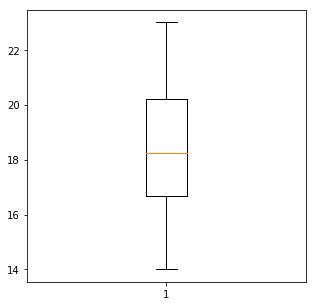

In [10]:
#Box-and-whiskers diagram
plt.figure(figsize=(5, 5))
plt.boxplot(data)
plt.show()

In [11]:
#Standard deviation
sd = d ** (1/2)
print(f'Standard deviation: {sd:2.4f}')

Standard deviation: 2.3378


In [12]:
#Excess
exc = (np.sum((data - m) ** 4) / (n * sd ** 4)) - 3
print(f'Excess: {exc:2.4f}')

Excess: -0.8075


In [13]:
#Asymmetry
asy = np.sum((data - m) ** 3) / (n * sd ** 3)
print(f'Asymmetry: {asy:2.4f}')

Asymmetry: 0.0547


In [14]:
#Min, max
minimum = data.min()
maximum = data.max()
print(f'Min: {minimum:2.2f}; Max: {maximum:2.2f}')

Min: 14.00; Max: 23.00


In [15]:
i = np.arange(n)
n_i = np.array([np.count_nonzero(data == i) for i in np.unique(data)])
print(n_i.shape[0] / 2)
print(f'Sum of n_i: {np.sum(n_i):2.2f} = {n:2.2f}')

33.0
Sum of n_i: 84.00 = 84.00


In [16]:
#Hypothesis of Pirs
alpha = 0.025
n_i = [11, 9, 14, 13, 14, 11, 12]
n_i_ch = [11.17, 10.31, 14.09, 18.41, 20.56, 14.29, 11.17]
X = 0
X_dang = 11.1
for i in range(len(n_i)):
    X += ((n_i[i] - n_i_ch[i]) ** 2) / n_i_ch[i]
if X < X_dang:
    print("Hypothesis accepted")
else:
    print ("Hypothesis rejected")

Hypothesis accepted


In [17]:
#Interval of confidence for EX
gamma = 0.95
t_gamma = 1.96
eps = t_gamma * sd / (n ** (1/2))
print(f'Interval for EX: {m - eps:2.2f} < EX < {m + eps:2.2f}')
#Interval of confidence for SD
alpha = (1 - gamma) / 2
z_alpha = erf(1 - alpha / 2) ** (-1)
eps_sd = sd / (n ** (1/2))
print(f'Interval for SD: {sd - z_alpha * eps_sd:2.2f} < SD < {sd + z_alpha * eps_sd:2.2f}')

Interval for EX: 17.86 < EX < 18.86
Interval for SD: 2.03 < SD < 2.64
